# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Set visual style for plots
sns.set_style('whitegrid')

# Display all columns
pd.set_option('display.max_columns', None)

# Configuration

In [6]:
DATA_PATH = '../data/accepted_2007_to_2018Q4.csv'

# use 200,000 rows for to ensure speed
SAMPLE_SIZE = 200000 

print(f"Loading data from: {DATA_PATH}")

Loading data from: ../data/accepted_2007_to_2018Q4.csv


## Load Data

In [8]:
if os.path.exists(DATA_PATH):
    df = pd.read_csv(DATA_PATH, nrows=SAMPLE_SIZE, low_memory=False)
    print(f"Dataset loaded. Shape: {df.shape}")
else:
    print("File not found.")

Dataset loaded. Shape: (200000, 151)


## Initial Inspection

In [14]:
display(df.head(3))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 230.4+ MB
None


In [13]:
df['loan_status'].value_counts()

loan_status
Fully Paid            140992
Charged Off            35090
Current                22637
Late (31-120 days)       785
In Grace Period          347
Late (16-30 days)        148
Default                    1
Name: count, dtype: int64

# Wiring up the target & filtering

In [17]:
# Target 0: Fully Paid
# Target 1: Default or Charged Off

target_0 = ['Fully Paid']
target_1 = ['Charged Off', 'Default']

In [19]:
# Filter: Keep only rows that are in either list
df = df[df['loan_status'].isin(target_0 + target_1)].copy()

# Create the numeric target column required by Task 2
df['target'] = df['loan_status'].apply(lambda x: 1 if x in target_1 else 0)

In [20]:
print(f"Shape after filtering: {df.shape}")
print("Target Distribution (0 = Paid, 1 = Default):")
print(df['target'].value_counts(normalize=True))

Shape after filtering: (176083, 152)
Target Distribution (0 = Paid, 1 = Default):
target
0    0.800713
1    0.199287
Name: proportion, dtype: float64


# Exploratory Data Analysis (EDA)

## EDA-1 Target Variable

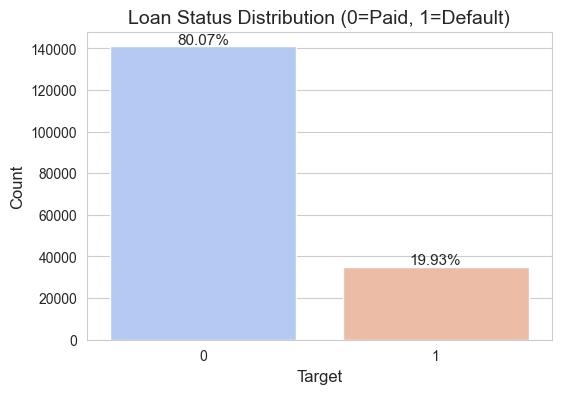

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Loan Status Distribution (0=Paid, 1=Default)', fontsize=14)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add percentage labels on top of bars
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2.,
            height + 1000,
            '{:1.2f}%'.format(100 * height/total),
            ha="center", fontsize=11)

plt.show()

## EDA-2 Missing Values

In [25]:
# Calculate missing percentage for each column
missing = df.isnull().sum() / len(df) * 100
missing = missing[missing > 0].sort_values(ascending=False)

# Filter for columns with > 30% missing data
missing_high = missing[missing > 30]

In [26]:
print(f"Total columns with missing data: {len(missing)}")
print(f"Columns with >30% missing data: {len(missing_high)}")

Total columns with missing data: 73
Columns with >30% missing data: 58


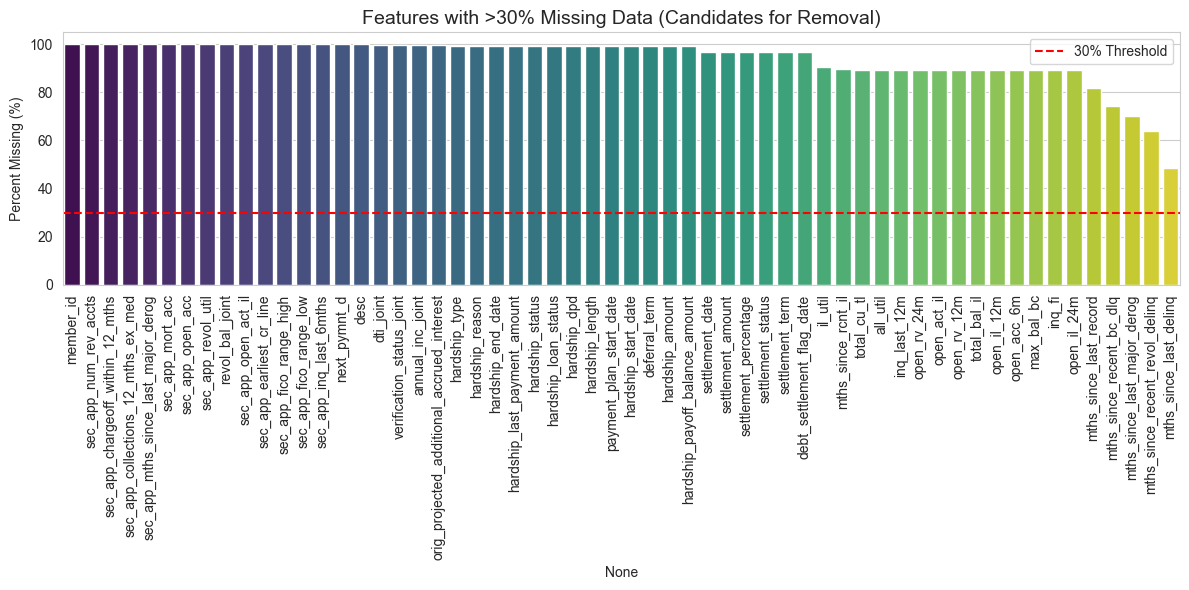

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_high.index, y=missing_high.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Features with >30% Missing Data (Candidates for Removal)', fontsize=14)
plt.ylabel('Percent Missing (%)')
plt.axhline(y=30, color='r', linestyle='--', label='30% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

## EDA-3 Risk Drivers 

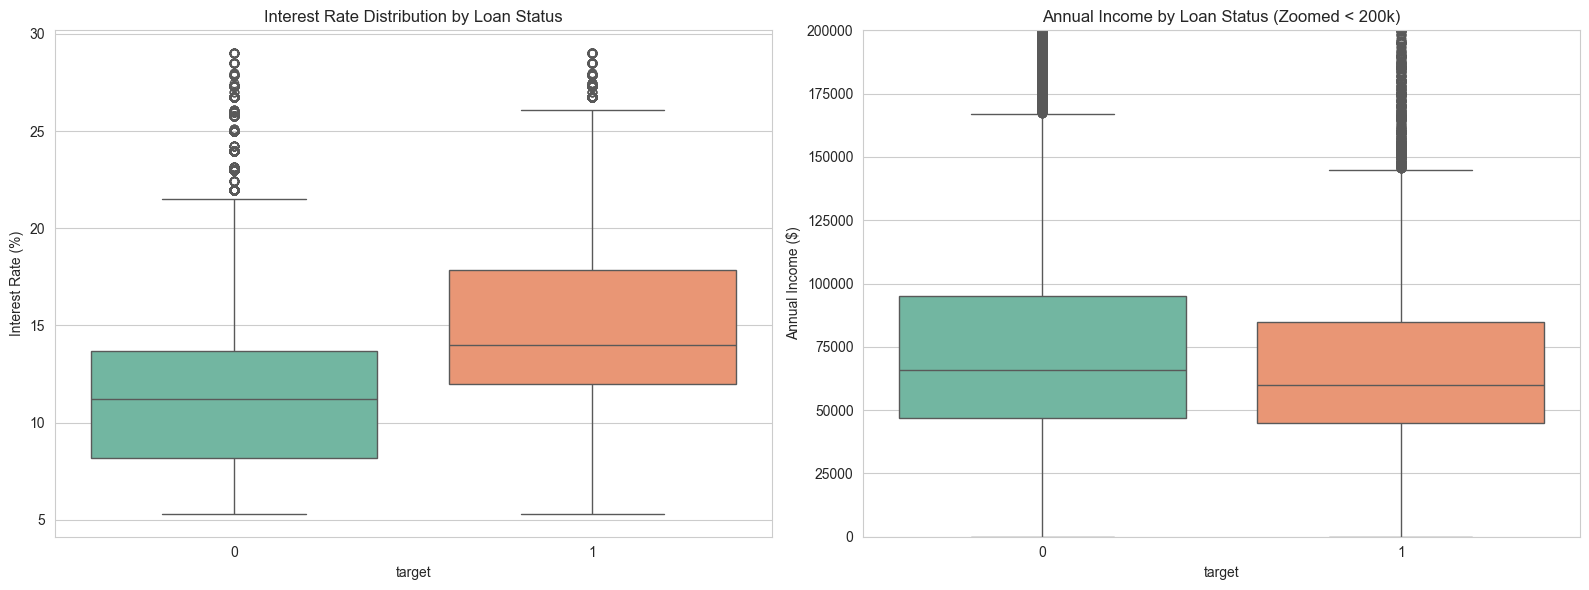

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Interest Rate vs. Default
sns.boxplot(x='target', y='int_rate', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Interest Rate Distribution by Loan Status')
axes[0].set_ylabel('Interest Rate (%)')

# Plot 2: Annual Income vs. Default
# Capping income at 200k for visualization.
sns.boxplot(x='target', y='annual_inc', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Annual Income by Loan Status (Zoomed < 200k)')
axes[1].set_ylabel('Annual Income ($)')
axes[1].set_ylim(0, 200000) 

plt.tight_layout()
plt.show()

## EDA-4 Correlation Matrix

In [31]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

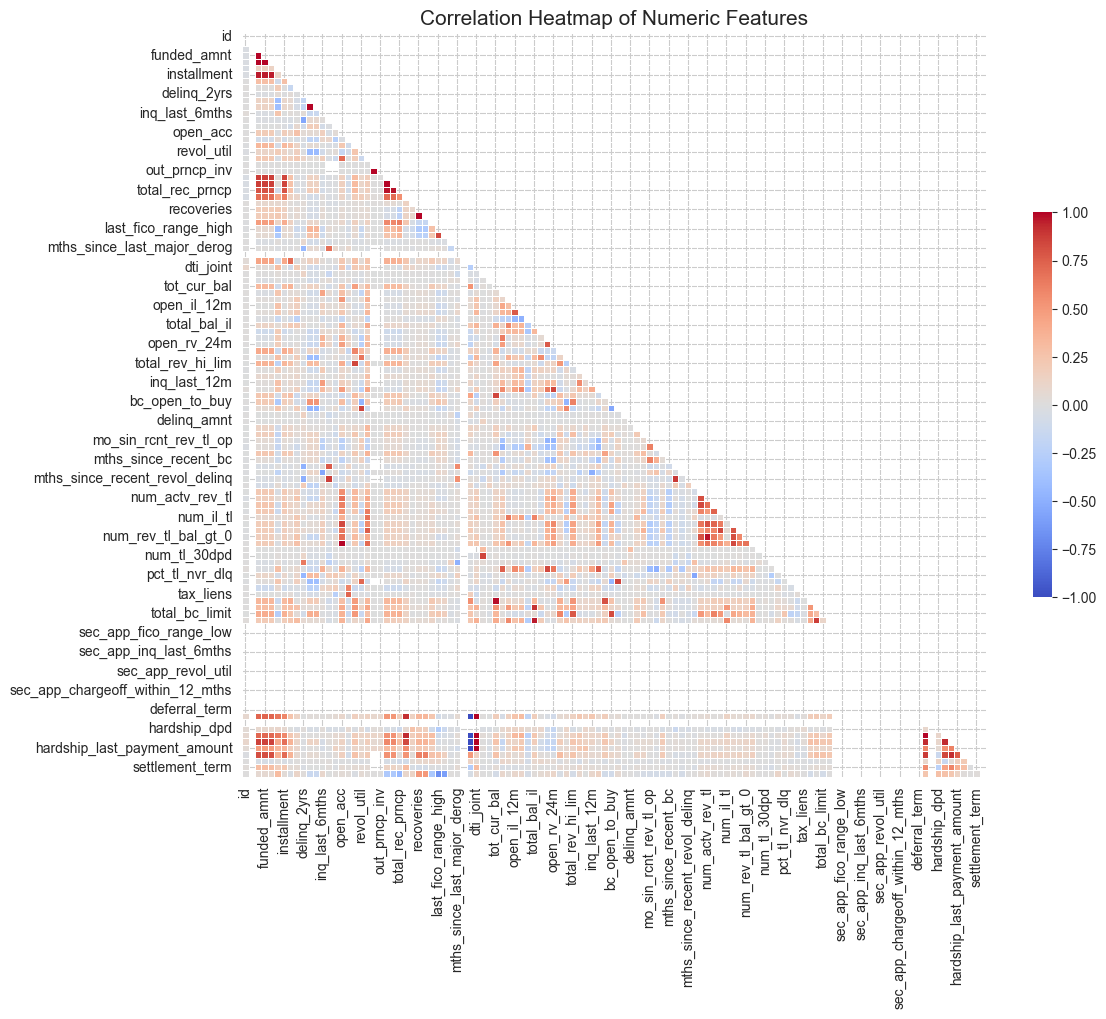

In [33]:
plt.figure(figsize=(12, 10))
# Masking the upper triangle because it's identical to the lower one.
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Numeric Features', fontsize=15)
plt.show()

In [34]:
# Print pairs with correlation > 0.9 
print("Highly Correlated Pairs (>0.9):")

corr_pairs = corr_matrix.unstack()
strong_pairs = corr_pairs[((corr_pairs > 0.9) | (corr_pairs < -0.9)) & (corr_pairs != 1.0)]

# Remove duplicates (A-B is same as B-A)
strong_pairs = strong_pairs.drop_duplicates()
print(strong_pairs)

Highly Correlated Pairs (>0.9):
loan_amnt                                   funded_amnt_inv                               0.999992
                                            installment                                   0.954795
funded_amnt_inv                             installment                                   0.954777
fico_range_low                              fico_range_high                               1.000000
open_acc                                    num_sats                                      0.998425
total_pymnt                                 total_pymnt_inv                               0.999994
                                            total_rec_prncp                               0.971950
total_pymnt_inv                             total_rec_prncp                               0.972027
total_rec_int                               hardship_amount                               0.910859
                                            orig_projected_additional_accrued

# Feature Selection

## FS-1 Remove Data Leakage: Columns generated AFTER loan approval

<p>We must remove any column that is generated after the loan is approved.

Leakage: total_pymnt, recoveries, last_pymnt_d. These happen in the future.

Result: If we keep them, the model will have "hindsight bias" and fail in production.</p>

In [35]:
leakage_cols = [
    'total_pymnt', 'total_pymnt_inv',
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
    'recoveries', 'collection_recovery_fee',
    'last_pymnt_d', 'last_pymnt_amnt',
    'next_pymnt_d', 'last_credit_pull_d',
    'debt_settlement_flag', 'debt_settlement_flag_date',
    'settlement_status', 'settlement_date', 'settlement_amount',
    'settlement_percentage', 'settlement_term',
    'out_prncp', 'out_prncp_inv',
    'funded_amnt', 'funded_amnt_inv', # Redundant with loan_amnt, and funded_inv is post-approval
    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', # Hardship happens after trouble starts
    'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
    'hardship_length', 'hardship_dpd', 'hardship_loan_status',
    'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount',
    'hardship_last_payment_amount', 'disbursement_method'
]

In [36]:
cols_to_drop = [c for c in leakage_cols if c in df.columns]

print(f"Shape BEFORE Leakage Drop: {df.shape}")

df = df.drop(columns=cols_to_drop)
print(f"Shape AFTER Leakage Drop: {df.shape}")

Shape BEFORE Leakage Drop: (176083, 152)
Shape AFTER Leakage Drop: (176083, 115)


## FS-2 Remove >30% Missing Data Columns

<p>Imputing (guessing) 30%+ of a column introduces massive noise. It's safer to drop them.</p>

In [37]:
missing = df.isnull().sum() / len(df)
missing_cols = missing[missing > 0.3].index.tolist()

print(f"Dropping {len(missing_cols)} columns with >30% missing data.")
print(f"Examples: {missing_cols[:5]}")

Dropping 38 columns with >30% missing data.
Examples: ['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']


In [38]:
df = df.drop(columns=missing_cols)
print(f"Shape AFTER Missing Drop: {df.shape}")

Shape AFTER Missing Drop: (176083, 77)


## FS-3 Remove Irrelevant & Redundant Features

In [39]:
irrelevant_cols = [
    'id', 'member_id', 'url', 'desc', 'emp_title', 'title', 'zip_code',
    'policy_code', 'pymnt_plan', 'addr_state', 'earliest_cr_line', 'issue_d',
    'sub_grade' 
]

redundant_cols = [
    'installment', # Highly correlated with loan_amnt
    'fico_range_high' # Perfectly correlated with fico_range_low
]

In [40]:
cols_to_drop = irrelevant_cols + redundant_cols
cols_to_drop = [c for c in cols_to_drop if c in df.columns]

In [41]:
df = df.drop(columns=cols_to_drop)
print(f"Shape AFTER Final Selection: {df.shape}")
print("\n")
print("Final Feature Set:")
print(df.columns.tolist())

Shape AFTER Final Selection: (176083, 64)


Final Feature Set:
['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m'

# Pre-Processing

## PP-1 Final Cleanup (Drop Leakage & Parse Text)

In [42]:
drop_cols = ['last_fico_range_high', 'last_fico_range_low', 'loan_status']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [ ]:
# Take the first 3 characters and strip whitespace
df['term'] = df['term'].astype(str).str.replace(' months', '').astype(int)

In [44]:
# Parse 'emp_length' to integer
# Logic: "10+ years" -> 10, "< 1 year" -> 0, "NaN" -> 0 (assume unemployed if missing)
def parse_emp_length(x):
    if pd.isna(x):
        return 0
    x = str(x)
    if '<' in x:
        return 0
    if '+' in x:
        return 10
    # Extract digit
    return int(''.join(filter(str.isdigit, x)))

df['emp_length'] = df['emp_length'].apply(parse_emp_length)

In [45]:
print(f"Shape after cleanup: {df.shape}")
print("Check parsed columns:")
print(df[['term', 'emp_length']].head())

Shape after cleanup: (176083, 61)
Check parsed columns:
   term  emp_length
0    36          10
1    36          10
2    60          10
4    60           3
5    36           4


## PP-2 Handling Remaining Missing Values

<p>dropped columns with >30% missing data, but some remaining columns might have 1-5% missing (e.g., dti, revol_util).

Numerical: Fill with Median (safest for financial data with outliers).

Categorical: Fill with "Unknown"</p>

In [46]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [47]:
if 'target' in num_cols:
    num_cols.remove('target')

print(f"Numerical Features: {len(num_cols)}")
print(f"Categorical Features: {len(cat_cols)}")

Numerical Features: 54
Categorical Features: 6


In [48]:
# 1. Fill Numerical Nulls with Median
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# 2. Fill Categorical Nulls with "Unknown"
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna("Unknown")

In [49]:
print(f"Total Missing Values Left: {df.isnull().sum().sum()}")

Total Missing Values Left: 0


## PP-3 Categorical Encoding

In [50]:
df_clean = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [51]:
df_clean.columns = df_clean.columns.str.replace(' ', '_').str.replace('<', 'lt').str.replace('+', 'plus')

In [52]:
print(f"Final Data Shape: {df_clean.shape}")

Final Data Shape: (176083, 80)


# Save the final cleansed and processed data

In [53]:
processed_path = '../data/processed_loans.csv'
df_clean.to_csv(processed_path, index=False)
print(f"Saved processed data to: {processed_path}")

Saved processed data to: ../data/processed_loans.csv


In [54]:
display(df_clean.head(3))

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source_Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint_App
0,3600.0,36,13.99,10,55000.0,5.91,0.0,675.0,1.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1,24700.0,36,11.99,10,65000.0,16.06,1.0,715.0,4.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,20000.0,60,10.78,10,63000.0,10.78,0.0,695.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
